# Sanfrancisco Crime data for summer 2014

In [1]:
%matplotlib inline

import csv
import matplotlib.pyplot as plt


def read_input():
    wanted_fields = ["Category", "DayOfWeek", "Date", "Time", "PdDistrict"]

    def field_extractor(dic):
        return dict([(field, dic[field]) for field in wanted_fields])

    data = []
    with open("sanfrancisco_incidents_summer_2014.csv", "r") as f:
        reader = csv.DictReader(f)
        for line in reader:
            data.append(field_extractor(line))
    return data


input_data = read_input()


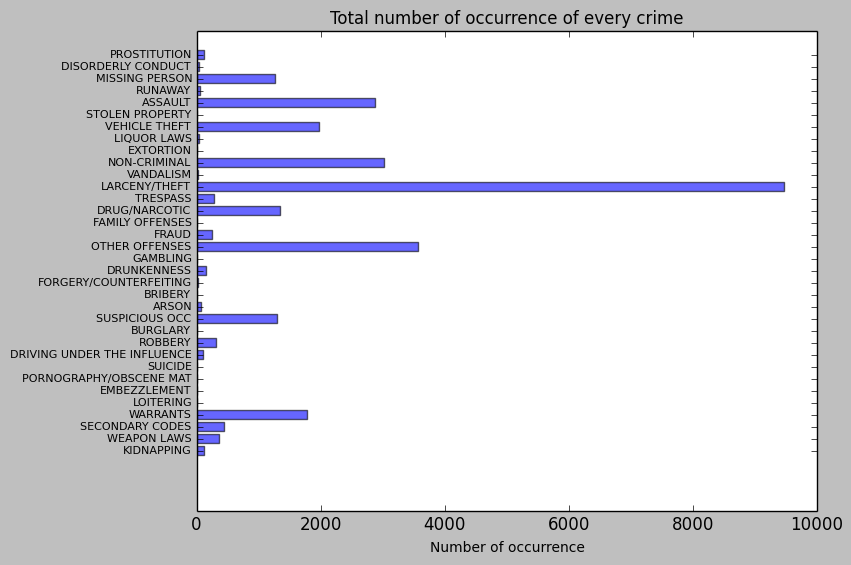

In [2]:
def plot_crime_type(data):
    # extract data
    crime_types = {}
    for rec in data:
        c_type = rec["Category"]
        crime_types[c_type] = crime_types.get(c_type, 0) + 1
        
    categories = crime_types.keys()

    # plot data
    plt.rcdefaults()
    y_pos = map(lambda a: a, range(len(categories)))
    plt.barh(y_pos, [crime_types[cat] for cat in crime_types], align='center', alpha=0.6)
    plt.yticks(y_pos, categories, fontsize=8)
    plt.xlabel('Number of occurrence', fontsize=10)
    plt.title('Total number of occurrence of every crime', fontsize=12)

    plt.show()
    

plot_crime_type(input_data)


#### Thief is the most common crime in Sanfrancisco

The above plot shows how many times each crime occurs in Sanfrancisco summer 2014, counted from the provided data for this assignment. Thief distinctively has the highest occurrence number: 9374 times, followed by other offences: 3218 times. Noticably, the number of non-criminal records is surprisingly high: 2928 times which is the 3rd highest in the plot.



### ----------------------------------------------------------------------------------------------------------------------------------

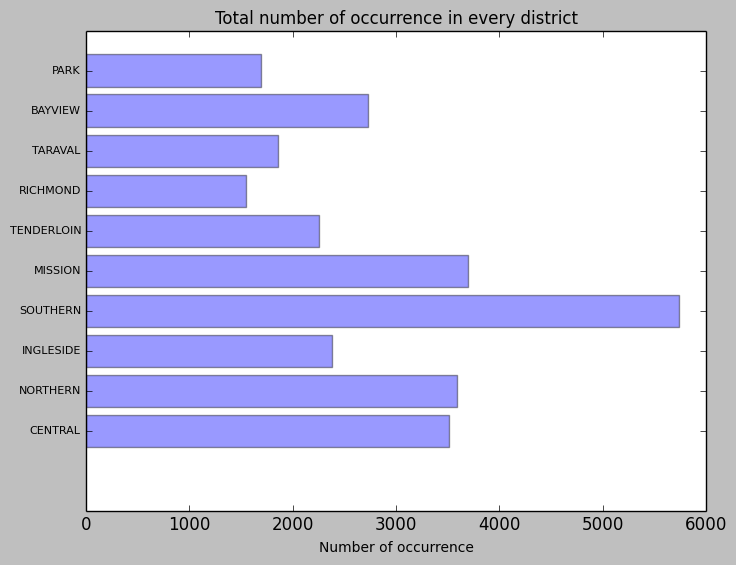

In [3]:
def plot_crime_district(data):
    # extract data
    crime_count = {}
    for rec in data:
        d = rec["PdDistrict"]
        crime_count[d] = crime_count.get(d, 0) + 1
        
    districts = crime_count.keys()

    # plot data
    plt.rcdefaults()
    y_pos = map(lambda a: a, range(len(districts)))
    plt.barh(y_pos, [crime_count[d] for d in districts], align='center', alpha=0.4)
    plt.yticks(y_pos, districts, fontsize=8)
    plt.xlabel('Number of occurrence', fontsize=10)
    plt.title('Total number of occurrence in every district', fontsize=12)

    plt.show()

plot_crime_district(input_data)

The plot above shows the number of all crime in every district. It shows that Shouthern districts has a distrinctively higher amount of crime: 5739. The districts with the lowest crime numbers are Richmond, Park, Taraval.

### ----------------------------------------------------------------------------------------------------------------------------------

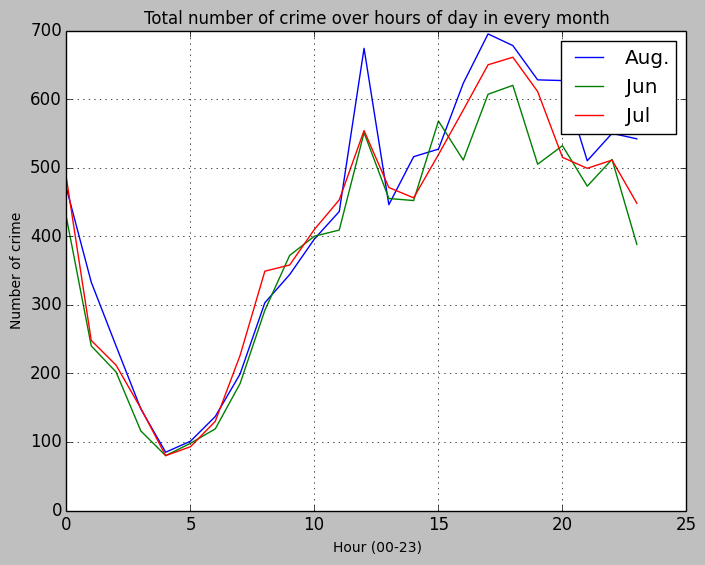

In [4]:
def plot_crime_time(data):
    crime_count = {}
    for rec in data:
        month = int(rec["Date"].split("/")[0])
        crime_count[month] = crime_count.get(month) or [0]*24
        t = rec["Time"]
        crime_count[month][int(t.split(":")[0])] += 1

    # plot data
    months = {8: "Aug.", 7: "Jul", 6: "Jun"}
    plt.rcdefaults()
    for month in crime_count:
        plt.plot(range(24), crime_count[month], label=months[month])
    plt.xlabel('Hour (00-23)', fontsize=10)
    plt.ylabel('Number of crime', fontsize=10)
    plt.title('Total number of crime over hours of day in every month', fontsize=12)
    plt.legend()

    ax = plt.gca()
    ax.grid(True)

    plt.show()
    
plot_crime_time(input_data)

The plot above shows the number of all crimes over all hours, counted for each month in the data. We have 3 months of the summer 2014: June, July and August. The plot reveals a common pattern over all three months:
+ The numbers of crime over hours are the same for 3 months, with a slight drop in August.
+ The numbers of crime drop around 5-6 am, has a peak around 1pm, then drops and comes back high from 4 to 7pm